In [17]:
import pymc3 as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%qtconsole --colors=linux
plt.style.use('ggplot')

# Chapter 3 - Inferences with binomials
## 3.1 Inferring a rate


Inferring the rate $\theta$ of a binary process  
$$ \theta \sim \text{Beta}(1, 1)  $$
$$ k \sim \text{Binomial} ( \theta, n)  $$

In the example, we set k = 5 and n = 10

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
  0%|          | 0/200000 [00:00<?, ?it/s]
Convergence archived at 100
Interrupted at 100 [0%]: Average Loss = 2.3999
100%|██████████| 1500/1500.0 [00:01<00:00, 973.35it/s]


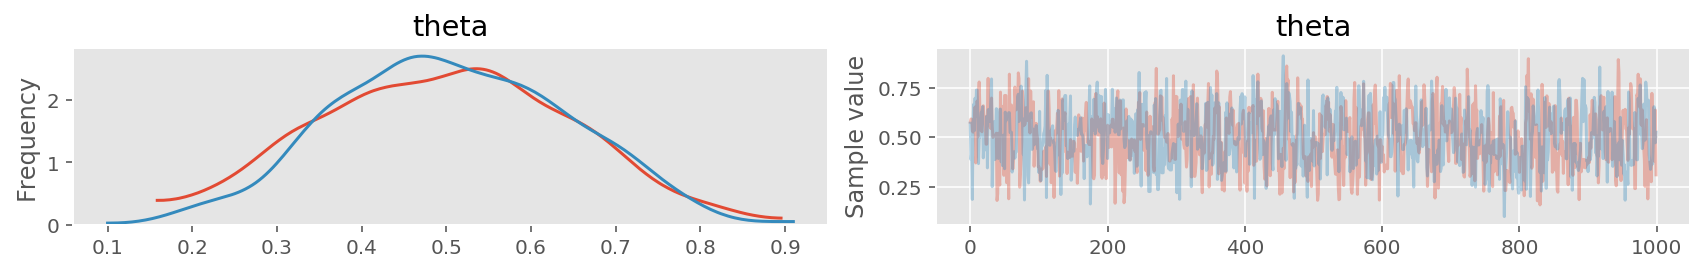

In [18]:
# Data
k = np.array([5])
n = np.array([10])

with pm.Model() as model1:
    # prior
    theta = pm.Beta('theta', alpha=1, beta=1)
    # observed
    x = pm.Binomial('x', n=n, p=theta, observed=k)
    # inference
    trace1 = pm.sample(1e3, njobs=2)

pm.traceplot(trace1, varnames=['theta']);

And generate a picture that is identical to 3.2 one on page 39 of Wagenmakers, 2013:

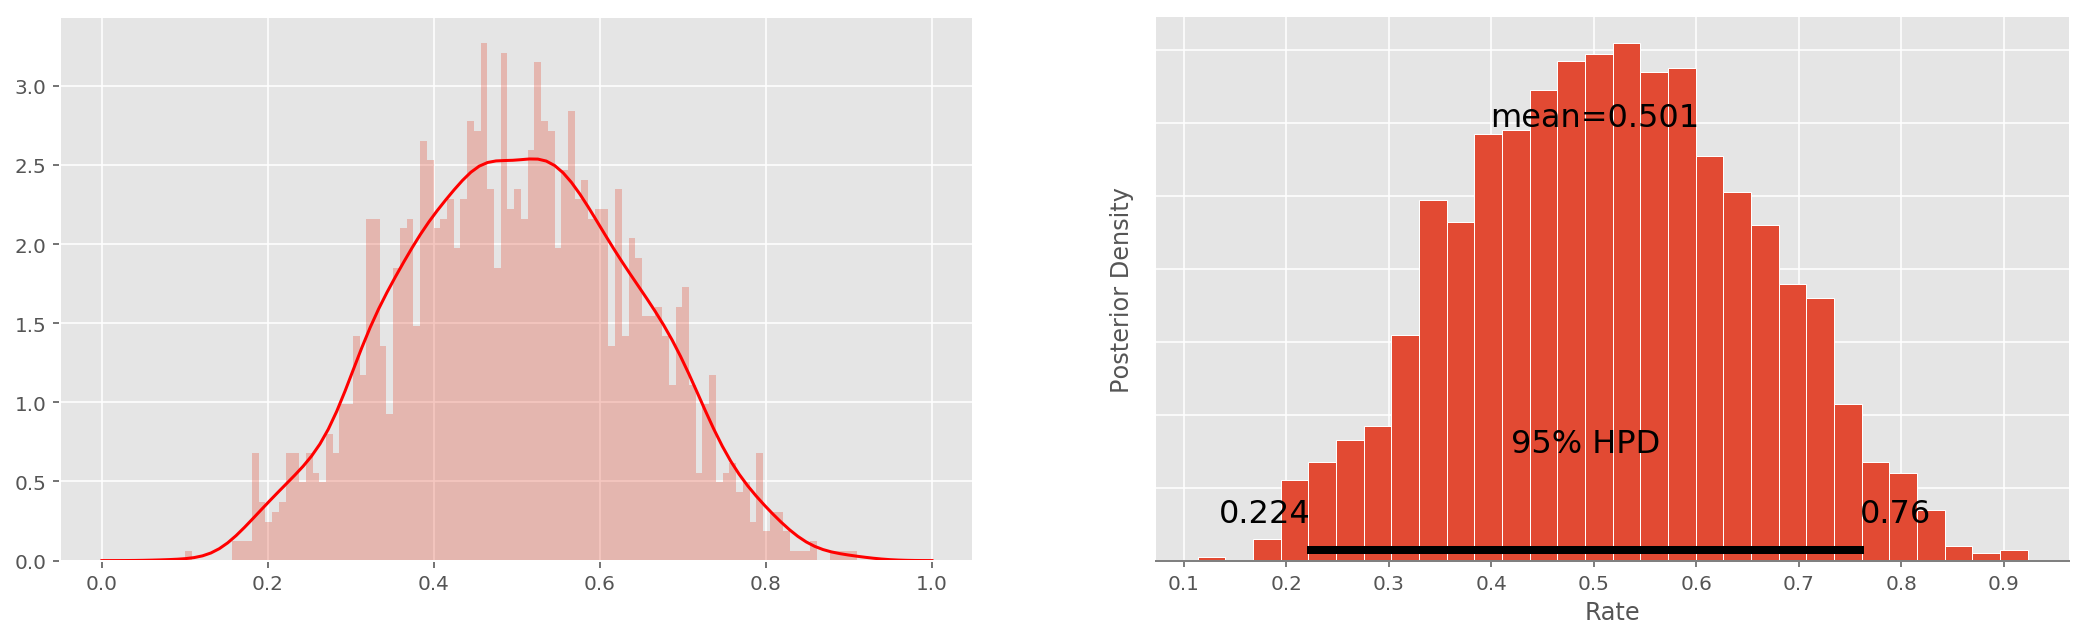

In [19]:
from scipy.stats.kde import gaussian_kde   # for plotting: to calculate a continuous 
                                           # approximation of the posterior and prior densities. 

my_pdf = gaussian_kde(trace1['theta'][:])
x=np.linspace(0, 1, 100)
_, axes = plt.subplots(1, 2, figsize=(18, 5))
axes[0].plot(x, my_pdf(x), 'r') # distribution function
axes[0].hist(trace1['theta'][:], bins=100, normed=1, alpha=.3)
plt.xlabel('Rate')
plt.ylabel('Posterior Density')

pm.plot_posterior(trace1['theta'][:], ax=axes[1])
plt.show()

In [20]:
pm.summary(trace1, varnames=['theta'])# gives the same credible interval as in the book.


theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.501            0.141            0.004            [0.224, 0.760]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.231          0.398          0.500          0.601          0.770



## 3.2 Difference between two rates

Inferring the rate $\theta$ of two binary process  
$$ \theta \sim \text{Beta}(1, 1)  $$
$$ k \sim \text{Binomial} ( \theta, n)  $$

In the example, we set k1 = 5, n1 = 10 and k2 = 7, n2 = 10 

The model involve a deterministic part in pymc3.

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 5.1101:   1%|          | 1982/200000 [00:00<00:20, 9672.91it/s]
Convergence archived at 2100
Interrupted at 2,100 [1%]: Average Loss = 5.2171
100%|██████████| 1500/1500.0 [00:02<00:00, 654.11it/s]


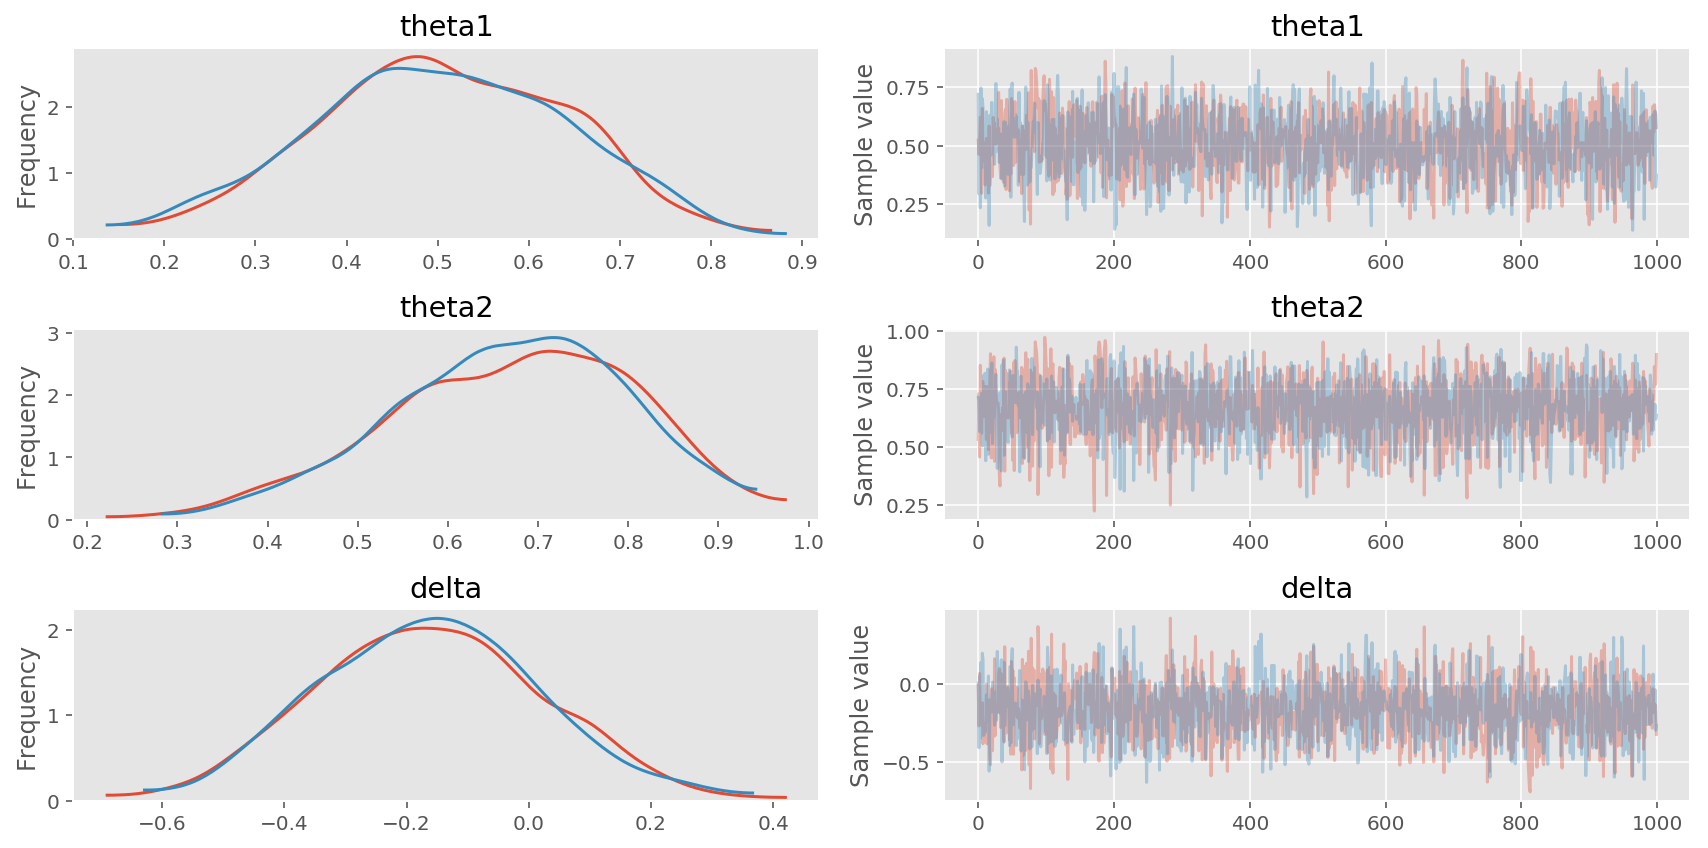

In [21]:
# data
k1, k2 = 5, 7
n1 = n2 = 10

with pm.Model() as model2:
    # prior
    theta1 = pm.Beta('theta1', alpha=1, beta=1)
    theta2 = pm.Beta('theta2', alpha=1, beta=1)
    # observed
    x1 = pm.Binomial('x1', n=n1, p=theta1, observed=k1)
    x2 = pm.Binomial('x2', n=n2, p=theta2, observed=k2)
    # differences as deterministic
    delta = pm.Deterministic('delta', theta1-theta2)
    # inference
    trace2 = pm.sample(1e3, njobs=2)

pm.traceplot(trace2);

In [22]:
pm.summary(trace2)# gives the credible interval


theta1:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.504            0.137            0.003            [0.230, 0.753]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.234          0.411          0.502          0.606          0.759


theta2:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.668            0.132            0.003            [0.407, 0.909]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.386          0.577          0.680          0.768          0.898


delta:

  Mean             SD               MC Error         95% HPD interval
  -----------------------

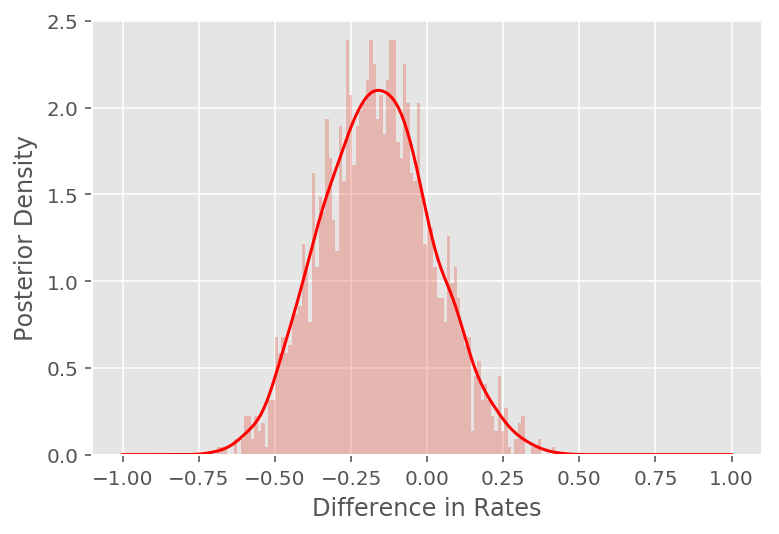

In [23]:
my_pdf = gaussian_kde(trace2['delta'])
x=np.linspace(-1, 1, 200)
plt.plot(x,my_pdf(x),'r') # distribution function

plt.hist(trace2['delta'],bins=100, normed=1,alpha=.3)
plt.xlabel('Difference in Rates')
plt.ylabel('Posterior Density')
plt.show()

## 3.3 Inferring a common rate

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
  0%|          | 0/200000 [00:00<?, ?it/s]
Convergence archived at 900
Interrupted at 900 [0%]: Average Loss = 4.7532
100%|██████████| 1500/1500.0 [00:01<00:00, 1006.15it/s]



theta:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.591            0.104            0.004            [0.385, 0.785]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.382          0.521          0.596          0.665          0.785



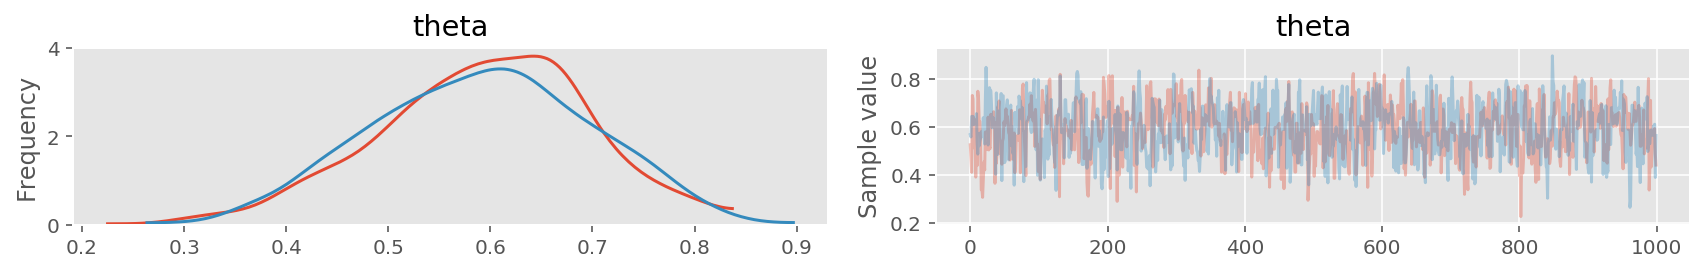

In [24]:
# Multiple trials
k = np.array([5, 7])
n = np.array([10, 10])

with pm.Model() as model3:
    # prior
    theta = pm.Beta('theta', alpha=1, beta=1)
    # observed
    x = pm.Binomial('x', n=n, p=theta, observed=k)
    # inference
    trace3 = pm.sample(1e3, njobs=2)

pm.traceplot(trace3, varnames=['theta']);
pm.summary(trace3)

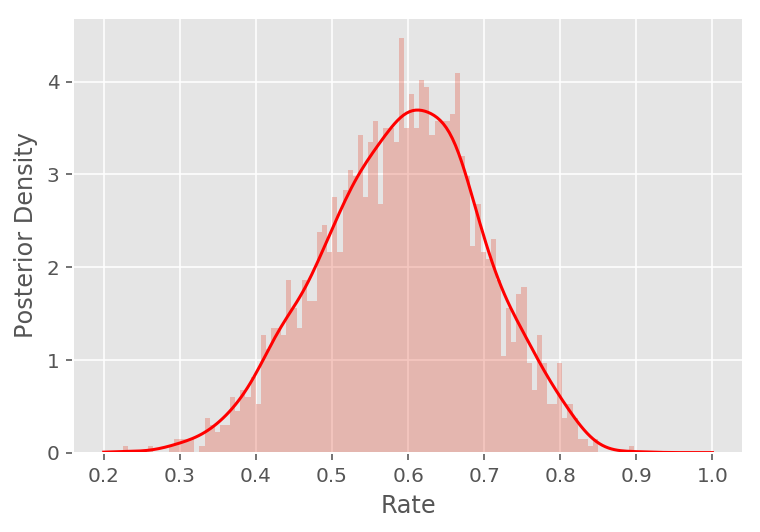

In [25]:
my_pdf = gaussian_kde(trace3['theta'])
x = np.linspace(0.2, 1, 200)
plt.plot(x, my_pdf(x), 'r') # distribution function

plt.hist(trace3['theta'], bins=100, normed=1, alpha=.3)
plt.xlabel('Rate')
plt.ylabel('Posterior Density');

## 3.4 Prior and posterior prediction

In [28]:
k = 1
n = 15
# Uncomment for Trompetter Data
# k = 24
# n = 121

# prior only model - no observation
with pm.Model() as model_prior:
    theta = pm.Beta('theta', alpha=1, beta=1)
    x = pm.Binomial('x', n=n, p=theta)
    trace_prior = pm.sample(3e3)
    
# with observation
with pm.Model() as model_obs:
    theta = pm.Beta('theta', alpha=1, beta=1)
    x = pm.Binomial('x', n=n, p=theta, observed=k)
    trace_obs = pm.sample(3e3)
    
# prediction (sample from trace)
ppc = pm.sample_ppc(trace_obs, samples=500, model=model_obs)

Assigned NUTS to theta_logodds__
Assigned Metropolis to x
100%|██████████| 3500/3500.0 [00:04<00:00, 803.23it/s]
Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 3.2216:   3%|▎         | 6390/200000 [00:00<00:18, 10701.85it/s]
Convergence archived at 7300
Interrupted at 7,300 [3%]: Average Loss = 4.8407
100%|██████████| 3500/3500.0 [00:01<00:00, 2059.41it/s]
100%|██████████| 500/500 [00:05<00:00, 93.91it/s]


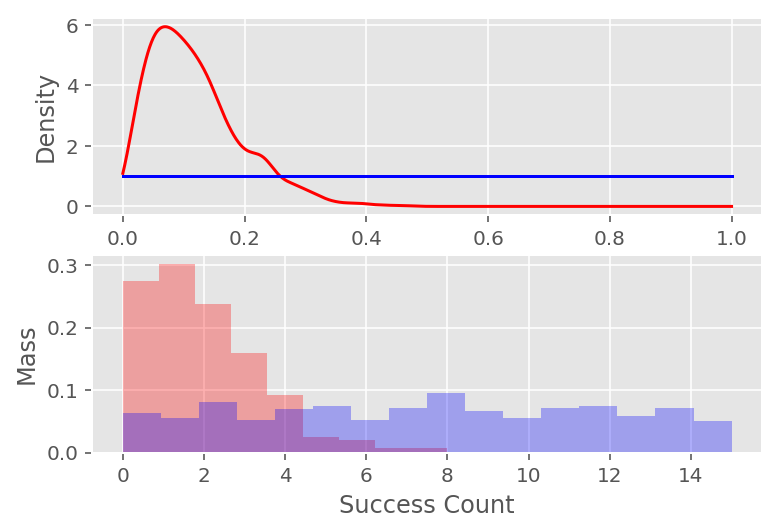

In [29]:
prior_x = trace_prior['x']
pred_theta = trace_obs['theta']

plt.subplot(2, 1, 1)
my_pdf = gaussian_kde(pred_theta)
x=np.linspace(0, 1, 1000)
plt.plot(x, my_pdf(x), 'r', label='Posterior') # distribution function
from scipy.stats import beta
plt.plot(x, beta.pdf(x, 1, 1), 'b', label='Prior')
plt.xlabel('Rate')
plt.ylabel('Density')

predictx = ppc['x']
plt.subplot(2, 1, 2)
plt.hist(predictx, normed=1, bins=len(np.unique(predictx)), 
         alpha=.3, color='r', label='Posterior')
plt.hist(prior_x, normed=1, bins=n+1, 
         alpha=.3, color='b', label='Prior')
plt.xlabel('Success Count')
plt.ylabel('Mass')
plt.show()

## 3.5 Posterior Predictive

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
  0%|          | 0/200000 [00:00<?, ?it/s]
Convergence archived at 900
Interrupted at 900 [0%]: Average Loss = 11.263
100%|██████████| 1500/1500.0 [00:01<00:00, 992.85it/s]
100%|██████████| 500/500 [00:12<00:00, 42.17it/s]


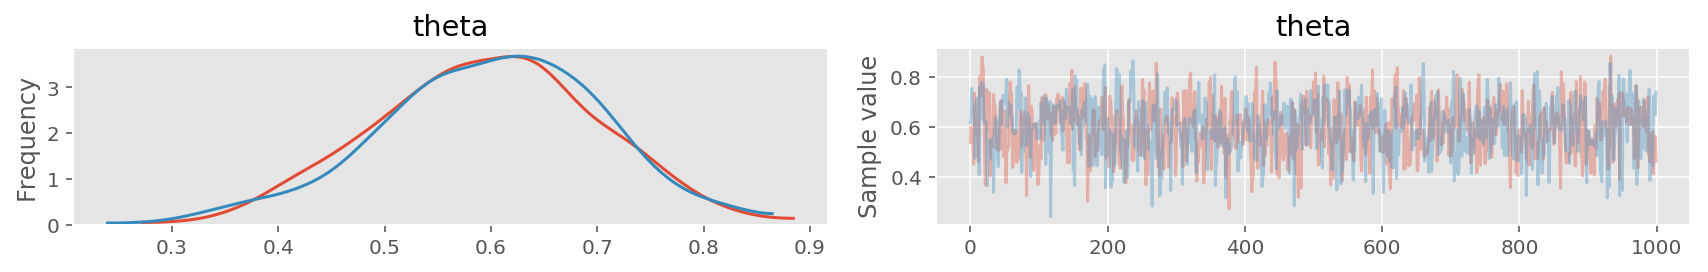

In [30]:
# Inferring a Common Rate, With Posterior Predictive
k1 = 2
n1 = 13
k2 = 10
n2 = 10

with pm.Model() as model5:
    # prior
    theta = pm.Beta('theta', alpha=1, beta=1)
    # observed
    x1 = pm.Binomial('x1', n=n2, p=theta, observed=k1)
    x2 = pm.Binomial('x2', n=n2, p=theta, observed=k2)
    # inference
    trace5 = pm.sample(1e3, njobs=2)

pm.traceplot(trace5, varnames=['theta']);
# prediction (sample from trace)
ppc5 = pm.sample_ppc(trace5, samples=500, model=model5)

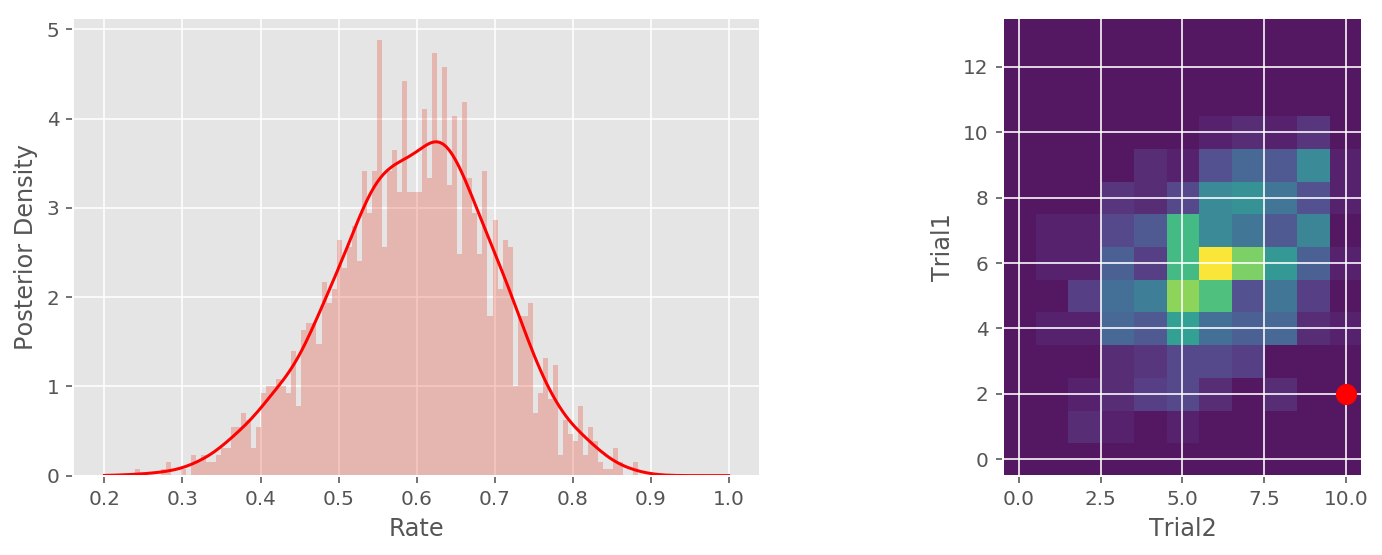

In [31]:
from matplotlib import gridspec

fig = plt.figure(figsize=(12, 4)) 
gs = gridspec.GridSpec(1,2, width_ratios=[2, 3]) 
ax0 = plt.subplot(gs[0])

my_pdf = gaussian_kde(trace5['theta'])
x = np.linspace(0.2, 1, 200)
ax0.plot(x, my_pdf(x), 'r') # distribution function

ax0.hist(trace5['theta'], bins=100, normed=1, alpha=.3)
plt.xlabel('Rate')
plt.ylabel('Posterior Density')

ax1 = plt.subplot(gs[1])
predx1 = ppc5['x1']
predx2 = ppc5['x2']

from scipy import sparse
A = sparse.csc_matrix((np.ones(len(predx1)), (predx1,predx2)), 
                      shape=(n1+1,n2+1)).todense()
ax1.imshow(A, interpolation='none', alpha=.9, origin='lower')
ax1.scatter(k2, k1, s=100, c=[1,0,0])
plt.xlabel('Trial2')
plt.ylabel('Trial1')
plt.tight_layout()

## 3.6 Joint distributions

Assigned NUTS to theta_logodds__
Assigned Metropolis to TotalN
100%|██████████| 10500/10500.0 [00:28<00:00, 369.33it/s]


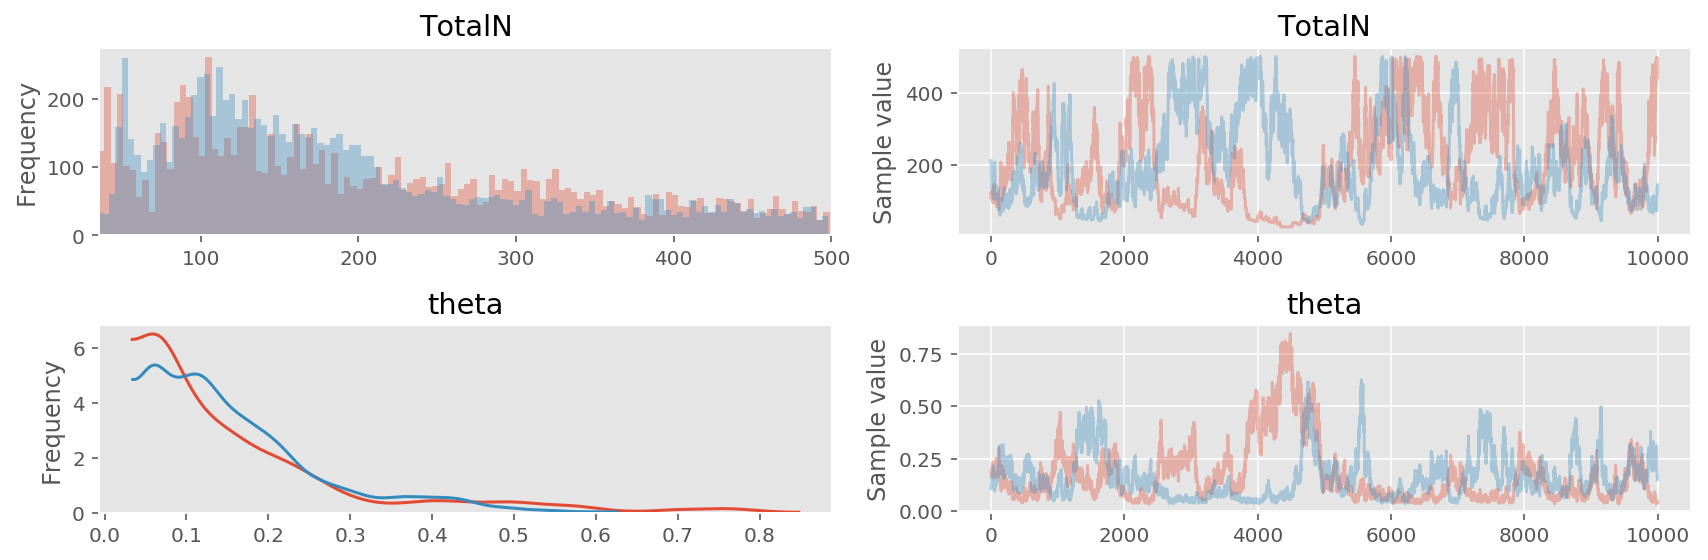

In [32]:
# the Survey example in the book
k = np.array([16,18,22,25,27])
nmax = 500
m = len(k)
    
with pm.Model() as model6:
    # prior
    theta = pm.Beta('theta', alpha=1,beta=1)
    TotalN = pm.DiscreteUniform('TotalN', lower=1, upper=nmax)
    # observed
    x = pm.Binomial('x', n=TotalN, p=theta, observed=k)
    # inference
    trace6 = pm.sample(1e4, njobs=2)

pm.traceplot(trace6);

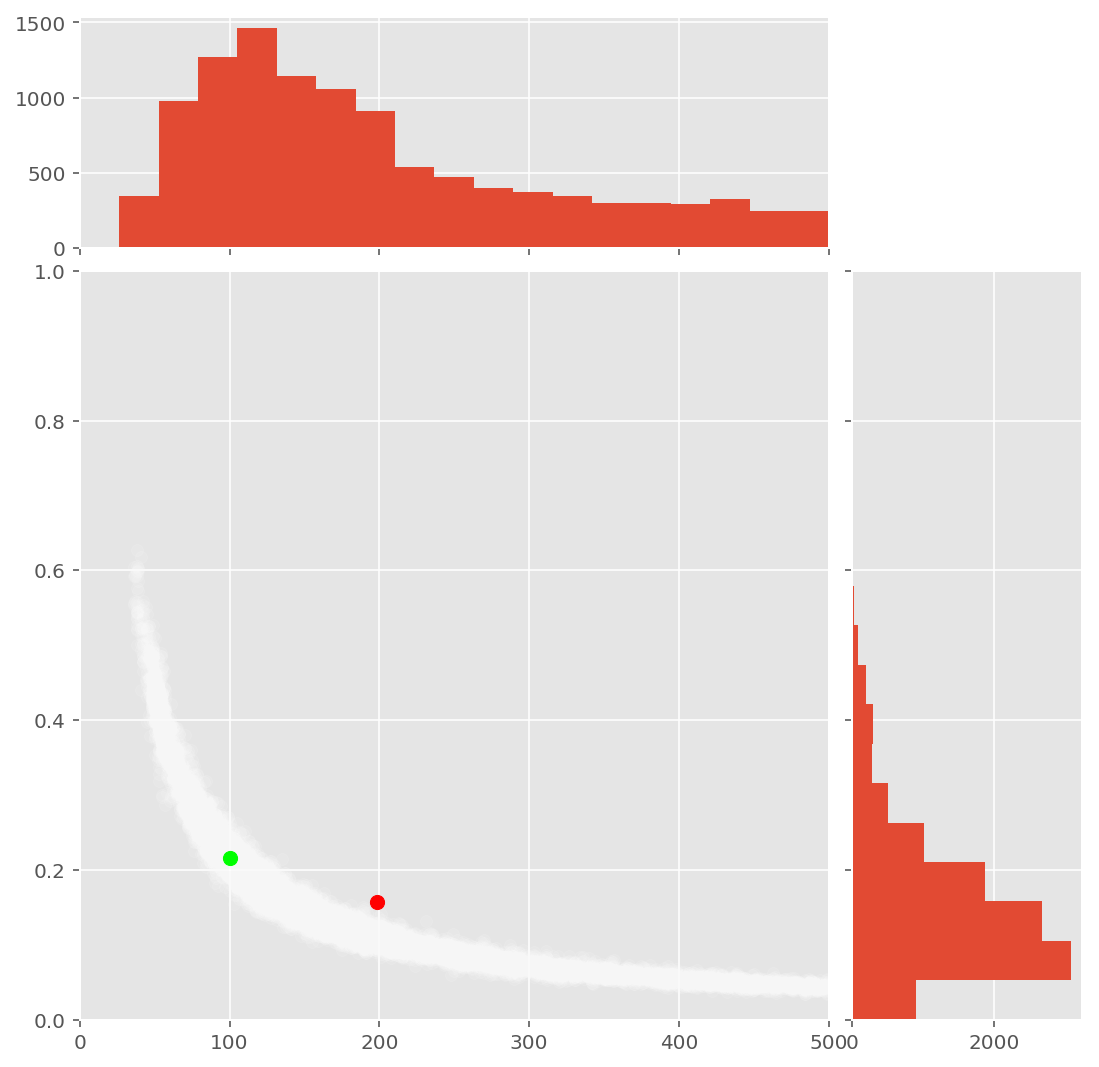

In [34]:
# First calculate MLE:
from scipy.special import *

burnin = 9000
thetapost = trace6['theta'][burnin:]
npost = trace6['TotalN'][burnin:]
cc = -float('Inf')
ind = 0

for i in range(0, len(npost)):
    logL = 0
    for j in k:   
        logL = logL+gammaln(npost[i]+1)-gammaln(j+1)-gammaln(npost[i] - j +1)
        logL = logL+j*np.log(thetapost[i])+(npost[i]-j)*np.log(1-thetapost[i])
    
    if logL > cc: 
        ind = i
        cc = logL
        
# print(ind)

from matplotlib.ticker import NullFormatter
nullfmt = NullFormatter()         # no labels
y = thetapost
x = npost

# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
bottom_h = left_h = left + width + 0.02

rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom_h, width, 0.2]
rect_histy = [left_h, bottom, 0.2, height]

# start with a rectangular Figure
plt.figure(1, figsize=(8, 8))

axScatter = plt.axes(rect_scatter)
axHistx = plt.axes(rect_histx)
axHisty = plt.axes(rect_histy)

# no labels
axHistx.xaxis.set_major_formatter(nullfmt)
axHisty.yaxis.set_major_formatter(nullfmt)

# the scatter plot:
axScatter.scatter(x, y, c=[1, 1, 1], alpha=.1)
axScatter.scatter(np.mean(x), np.mean(y), s=50, c=[1, 0, 0], alpha=1)
axScatter.scatter(x[ind], y[ind], s=50, c=[0, 1, 0], alpha=1)

# now determine nice limits by hand:
binwidth1 = 0.25
axScatter.set_xlim((0, nmax))
axScatter.set_ylim((0, 1))

bins1 = np.linspace(0, nmax, 20)
axHistx.hist(x, bins=bins1)
bins2 = np.linspace(0, 1, 20)
axHisty.hist(y, bins=bins2, orientation='horizontal')

axHistx.set_xlim(axScatter.get_xlim())
axHisty.set_ylim(axScatter.get_ylim())

plt.show()

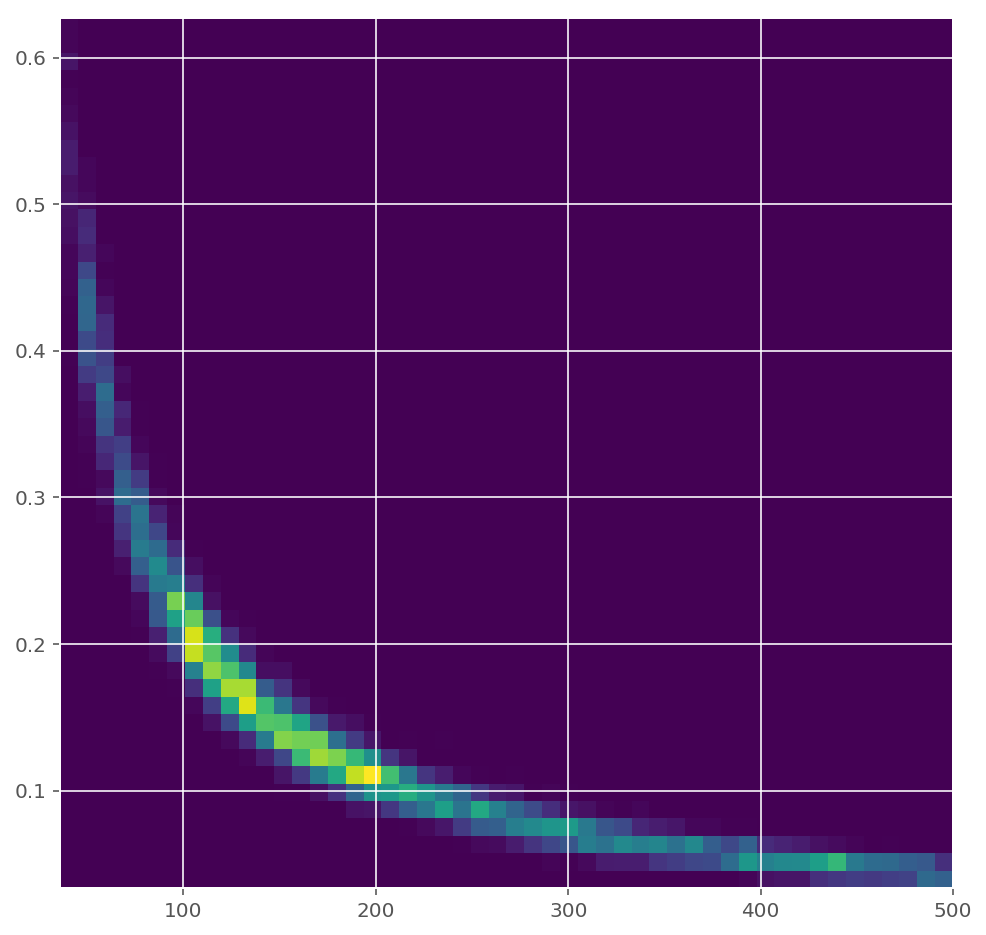

In [35]:
plt.figure(1, figsize=(8, 8))
plt.hist2d(x, y, bins=50)
plt.show()